<a href="https://colab.research.google.com/github/9143nithinreddy/Soft-Computing/blob/main/SC_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

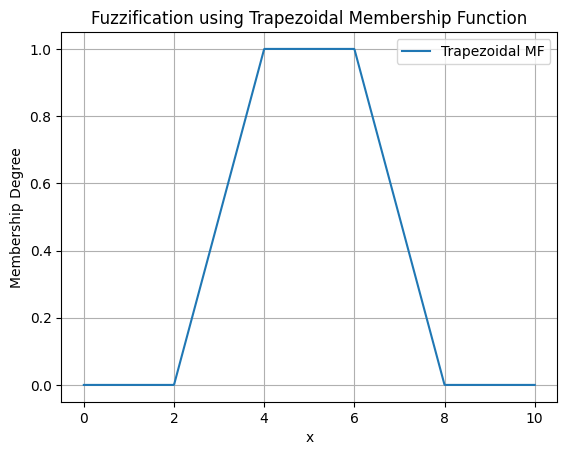

Defuzzified value (Bisector Method): 5.0000
Defuzzified value (Mean of Maximum): 5.0000


/tmp/ipython-input-3488848108.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_area = np.trapz(membership_values, universe)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_membership(x, a, b, c, d):
    """Compute trapezoidal membership value for a single x."""
    if x <= a or x >= d:
        return 0.0
    elif a < x < b:
        return (x - a) / (b - a)
    elif b <= x <= c:
        return 1.0
    elif c < x < d:
        return (d - x) / (d - c)

def fuzzify(universe, a, b, c, d):
    """Fuzzify a universe using a trapezoidal membership function."""
    return np.array([trapezoidal_membership(x, a, b, c, d) for x in universe])

def defuzzify_bisector(universe, membership_values):
    """Defuzzify using the bisector (center of area) method."""
    total_area = np.trapz(membership_values, universe)
    half_area = total_area / 2.0
    area = 0.0
    for i in range(len(universe) - 1):
        x0, x1 = universe[i], universe[i+1]
        y0, y1 = membership_values[i], membership_values[i+1]
        trapezoid_area = (y0 + y1) / 2 * (x1 - x0)
        area += trapezoid_area
        if area >= half_area:
            return (x0 + x1) / 2
    return universe[-1]  # fallback

def defuzzify_mean_of_maximum(universe, membership_values):
    """Defuzzify using mean of maximum (MoM) strategy."""
    max_value = np.max(membership_values)
    max_indices = np.where(membership_values == max_value)[0]
    max_x_values = universe[max_indices]
    return np.mean(max_x_values)

def main():
    # Define the universe of discourse
    universe = np.linspace(0, 10, 1000)

    # Trapezoidal parameters
    a, b, c, d = 2, 4, 6, 8

    # Fuzzify
    membership_values = fuzzify(universe, a, b, c, d)

    # Plot the trapezoidal membership function
    plt.plot(universe, membership_values, label="Trapezoidal MF")
    plt.title("Fuzzification using Trapezoidal Membership Function")
    plt.xlabel("x")
    plt.ylabel("Membership Degree")
    plt.grid(True)
    plt.legend()
    plt.show()

    # Defuzzify
    bisector_value = defuzzify_bisector(universe, membership_values)
    mom_value = defuzzify_mean_of_maximum(universe, membership_values)

    # Output
    print(f"Defuzzified value (Bisector Method): {bisector_value:.4f}")
    print(f"Defuzzified value (Mean of Maximum): {mom_value:.4f}")

# Run the program
main()


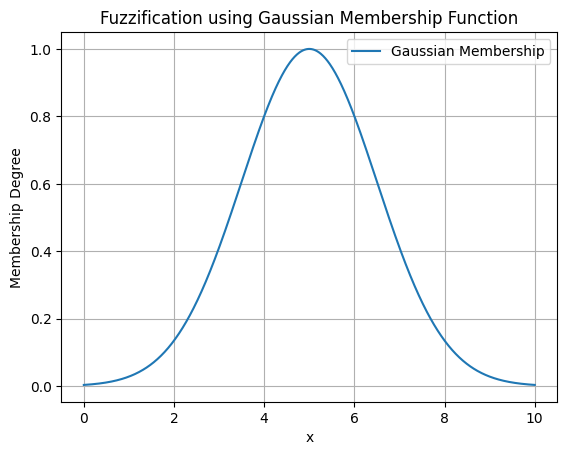

Defuzzified value (Center of Gravity): 5.0000


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_membership(x, c, sigma):
    """Gaussian membership function."""
    return np.exp(-0.5 * ((x - c) / sigma) ** 2)

def fuzzify(universe, c, sigma):
    """Fuzzify the universe using the Gaussian membership function."""
    return gaussian_membership(universe, c, sigma)

def defuzzify_cog(universe, membership_values):
    """Defuzzify using the center of gravity (centroid) method."""
    numerator = np.sum(universe * membership_values)
    denominator = np.sum(membership_values)
    if denominator == 0:
        return 0  # Avoid division by zero
    return numerator / denominator

def main():
    # Define universe of discourse
    universe = np.linspace(0, 10, 1000)

    # Parameters for Gaussian function
    center = 5.0     # c
    sigma = 1.5      # σ

    # Fuzzification
    membership_values = fuzzify(universe, center, sigma)

    # Plot the Gaussian membership function
    plt.plot(universe, membership_values, label='Gaussian Membership')
    plt.title('Fuzzification using Gaussian Membership Function')
    plt.xlabel('x')
    plt.ylabel('Membership Degree')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Defuzzification using Center of Gravity
    cog_value = defuzzify_cog(universe, membership_values)

    # Output the result
    print(f"Defuzzified value (Center of Gravity): {cog_value:.4f}")

# Run the program
main()
